In [12]:
import pandas as pd
import numpy as np

import sklearn 
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans


from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [8]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns', inplace = True)

In [10]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [15]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

D:\anaconda3\envs\MLpractice\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


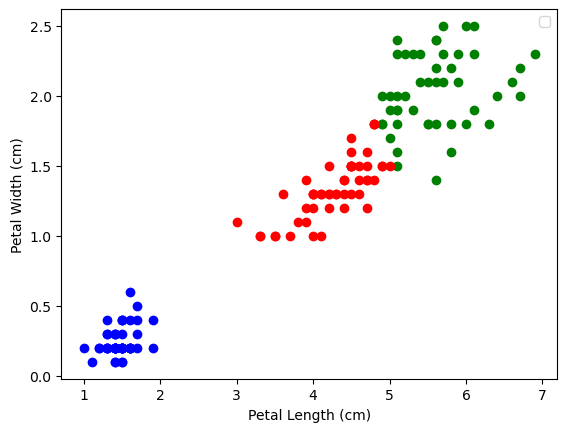

In [18]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'red')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

In [19]:
min_max_scaled_df = df.copy()

minmax = MinMaxScaler()
minmax.fit(min_max_scaled_df[['petal length (cm)']])
min_max_scaled_df[['petal length (cm)']] = minmax.transform(min_max_scaled_df[['petal length (cm)']])

minmax.fit(min_max_scaled_df[['petal width (cm)']])
min_max_scaled_df[['petal width (cm)']] = minmax.transform(min_max_scaled_df[['petal width (cm)']])
min_max_scaled_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [20]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(min_max_scaled_df[['petal length (cm)', 'petal width (cm)']])
y_predicted

D:\anaconda3\envs\MLpractice\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
min_max_scaled_df['cluster'] = y_predicted
min_max_scaled_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


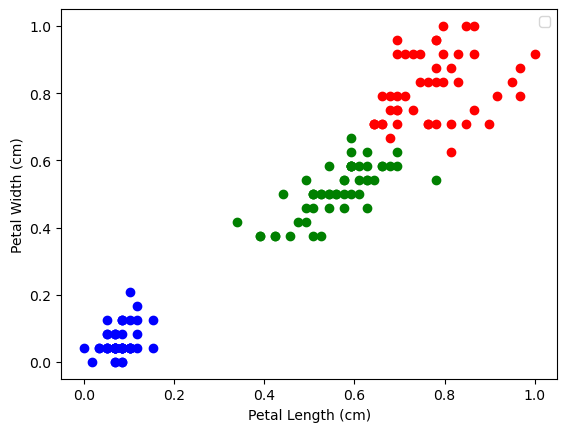

In [22]:
min_max_scaled_df1 = min_max_scaled_df[min_max_scaled_df.cluster ==0]
min_max_scaled_df2 = min_max_scaled_df[min_max_scaled_df.cluster ==1]
min_max_scaled_df3 = min_max_scaled_df[min_max_scaled_df.cluster ==2]

plt.scatter(min_max_scaled_df1['petal length (cm)'], min_max_scaled_df1['petal width (cm)'], color = 'green')
plt.scatter(min_max_scaled_df2['petal length (cm)'], min_max_scaled_df2['petal width (cm)'], color = 'blue')
plt.scatter(min_max_scaled_df3['petal length (cm)'], min_max_scaled_df3['petal width (cm)'], color = 'red')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

In [23]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(min_max_scaled_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

D:\anaconda3\envs\MLpractice\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\MLpractice\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\MLpractice\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\MLpractice\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memor

In [24]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667126,
 0.8565695322761692,
 0.6801035704886195,
 0.5658013138564928,
 0.48580845539143697,
 0.41363725779406146,
 0.38866789123125434]

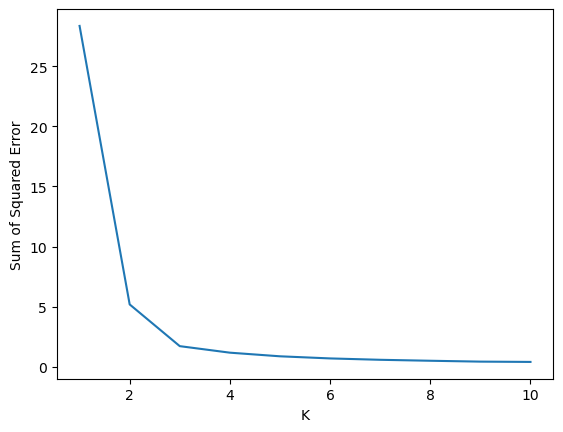

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(range(1, 11), sse)